In [ ]:
!pip install tensorflow-gpu==2.2.0-rc2

     |████████████████████████████████| 516.1MB 32kB/s 


In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
tf.__version__

'2.2.0-rc2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import zipfile

file = zipfile.ZipFile("drive/My Drive/cell-images-for-detecting-malaria.zip", "r")
file.extractall("/content/cell-images-for-detecting-malaria")
file.close()

In [ ]:
import pathlib
folder = pathlib.Path("/content/cell-images-for-detecting-malaria/cell_images/cell_images")
folder

PosixPath('/content/cell-images-for-detecting-malaria/cell_images/cell_images')

In [ ]:
all_images = list(folder.glob("*/*"))
all_images[0]

PosixPath('/content/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C171P132ThinF_IMG_20151119_153512_cell_190.png')

In [ ]:
# Convert all paths into a string
all_image_paths = [str(img_path) for img_path in all_images]
all_image_paths[:5]

['/content/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C171P132ThinF_IMG_20151119_153512_cell_190.png',
 '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C82P43ThinF_IMG_20150817_125114_cell_15.png',
 '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C127P88ThinF_IMG_20151004_111436_cell_125.png',
 '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C169P130ThinF_IMG_20151118_172913_cell_230.png',
 '/content/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C182P143NThinF_IMG_20151201_172607_cell_2.png']

In [ ]:
# Convert all string path into bytes
all_image_bytes = [tf.io.read_file(path) for path in all_image_paths]
all_image_bytes[:5]

[<tf.Tensor: shape=(), dtype=string, numpy=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00v\x00\x00\x00\x7f\x08\x02\x00\x00\x00\xb5\xca\xa1\x8e\x00\x00\x00\x07tIME\x07\xe0\x07\r\x15\x0b%(\xc7\xd9\xf8\x00\x00 \x00IDATx\x9c\xd5\xbd\xef\xaffI\x92\x1e\xf4<\x11\x99\xe7}oU\xf7\xb4\xc6\xeb5\xf0\x01\xc4G\x84\x90\x90=Z\xad\xbd6,\x18\x1b\x16\xb3\xb6\xd62\xb6\x91e!\xfe5\x84\xf6\x83%\x84w\xbd\x16X\xb6\xbcx\x00[xv\x18\xcb\xf0\x1f \x04\x92a<3\xddU\xf7\xbe\xe7dF\x04\x1f"3\xdfs\xabkf\xab\xaa\xabg{S\xa3\x9a\xdb\xf7\xbe?\xce\x89\x8c\x8cx\xe2\x89\x1f\x87\xf8H\xeb\x9f\xfe\x93\x7fH\x92\xa4\x16\xb6\xd6t+\xbd\xf7RJo\xe6\x82c\xef!t\xf7"\xd1{\x7f\xb8n\xbf\xf2\xcb\xbf\xf6\xb1\xbe\xfa\x1b\xbe\xca\xc7\xfa\xa0\x90\x00an\xe1JU-\x05\xa4{P\xcb&U6\xdf\x8f\xd6\xdbnd)\x9b\xf0\xa3}\xef7\x7f}<\x11\xc3E\xf4\xb2m\xa2\xc5\xdd{\xb7\x08Z\x97c7\xb8\xb9\x03\xa6\x95/\x0e\xbby\xf7Z\xf4c}\xef7\x7f\xf1+\xbe\xff{\xdf\xfb]\x00\xa2\x04\xa0\xa5\x90\x02\xa0w\xbf=\xee\xbd\xc5\xedU\x1cO!\xbd\xc0\xa5\xddv\x16\x81\xb6\xcb\xa7\xfa\xed?\xfa\

In [ ]:
# Convert all bytes into a tensor
all_image_tensors = [tf.image.decode_jpeg(img_byte) for img_byte in all_image_bytes]
all_image_tensors[:5]

[<tf.Tensor: shape=(127, 118, 3), dtype=uint8, numpy=
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8)>,
 <tf.Tensor: shape=(97, 154, 3), dtype=uint8, numpy=
 array([[[0, 0, 0],
         [0, 0, 0],
  

In [ ]:
# Visualise the shape of the images
image_tensor = [tf.shape(image) for image in all_image_tensors]
image_tensor[:5]

[<tf.Tensor: shape=(3,), dtype=int32, numpy=array([127, 118,   3], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 97, 154,   3], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([139, 139,   3], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([100, 109,   3], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([112, 115,   3], dtype=int32)>]

In [ ]:
tf.shape(all_image_paths)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([27558], dtype=int32)>

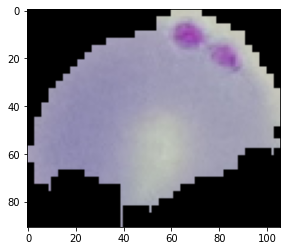

In [ ]:
random_image = np.random.randint(1000)
if all_image_tensors[random_image].shape[-1]==1:
  plt.imshow(all_image_tensors[random_image].numpy().squeeze())
else:
  plt.imshow(all_image_tensors[random_image])

In [ ]:
# Create a dataset for all images
ds_images = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [ ]:
# Preprocess the images and data augmentation 
def load_and_preprocess_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [128, 128])
  img = tf.image.random_flip_left_right(img)
  img = tf.image.random_contrast(img, 0.50, 0.90)
  img = img / 255.0
  
  return img

In [ ]:
# Create a dataset for all preprocessed images
ds_images = ds_images.map(load_and_preprocess_images)

In [ ]:
# Get image labels 
labels = []
for label in folder.iterdir():
  labels += [label.name]
  
labels

['Parasitized', 'Uninfected']

In [ ]:
# Get index for both "Parasitized" and "Uninfected"
label_index = {}

for i, label in enumerate(labels):
  label_index[label]= i
  
label_index  

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
label_index["Parasitized"]=1
label_index["Uninfected"]=0
label_index

{'Parasitized': 1, 'Uninfected': 0}

In [ ]:
len(labels)

2

In [ ]:
# Create lables for each image
all_image_labels = [label_index[path.parent.name] for path in list(folder.glob("*/*"))]
all_image_labels[:5]

[1, 1, 1, 1, 1]

In [ ]:
# Check whether len labels = len images
len(all_image_labels) == len(all_images)

True

In [ ]:
len(all_image_labels)

27558

In [ ]:
len(all_images)

27558

In [ ]:
# Create a tf.data.Dataset of labels 
ds_labels = tf.data.Dataset.from_tensor_slices(all_image_labels)
for example in ds_labels.take(1):
  print(example)

tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
# Create a full dataset 
full_ds = tf.data.Dataset.zip((ds_images, ds_labels))

for example in full_ds.take(1):
  print(example)

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147],
        ...,
        [0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147]],

       [[0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147],
        ...,
        [0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147]],

       [[0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147],
        ...,
        [0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147],
        [0.10811055, 0.09978019, 0.11142147]],

       ...,

       [[0.10811055, 0.09978019, 0.11142147],
        [0.1

In [ ]:
#for x, y in full_ds.take(1):
  #for i in range(len(y)):
    #plt.figure()
    #plt.imshow(x.numpy()[i])
    #plt.title('{} : {}'.format(y.numpy()[i] if label_index["Parasitized"]=1  else 'Uninfected')
    #plt.show()

In [ ]:
# Shuffle the dataset & create batchs 
full_ds = full_ds.shuffle(len(all_image_paths)).batch(16)

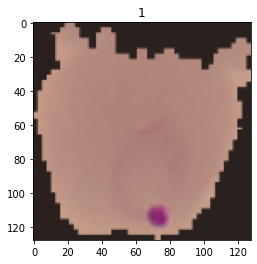

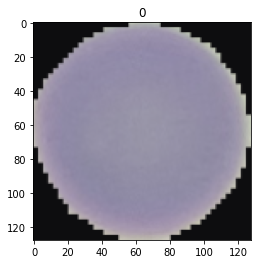

In [ ]:
# Visualize the first image of the first 2 batches
for example_x, example_y in full_ds.take(2):
  plt.title(example_y[0].numpy())
  plt.imshow(example_x[0].numpy())
  plt.show()  

In [ ]:
# Import a pre-trained model
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
# Set the weights of your imported model as non-trainable
base_model.trainable = False

In [ ]:
# Create the complete model by adding the last layers adapted to our situation
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Create a learning rate schedule  
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=6000,
    decay_rate=0.90,
    staircase=True)

In [ ]:
# Create a compiler
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss= tf.keras.losses.binary_crossentropy,
              metrics = [tf.keras.metrics.binary_accuracy])

In [ ]:
# Split our full_ds into a train_set and a test_set : 80/20
train_size = int(0.8*len(all_image_paths)/16)

train_set = full_ds.take(train_size)
test_set = full_ds.skip(train_size)

In [ ]:
# Fit your model and save each of the epochs in a history variable, add the validation_data argument
history = model.fit(train_set,
                    validation_data=test_set,
                    epochs=20,
                    verbose=1
                   )

Epoch 1/20
1377/1377 [==============================] - 50s 37ms/step - loss: 0.3626 - binary_accuracy: 0.8615 - val_loss: 0.2944 - val_binary_accuracy: 0.8807
Epoch 2/20
1377/1377 [==============================] - 51s 37ms/step - loss: 0.2804 - binary_accuracy: 0.8895 - val_loss: 0.2579 - val_binary_accuracy: 0.9016
Epoch 3/20
1377/1377 [==============================] - 51s 37ms/step - loss: 0.2542 - binary_accuracy: 0.9009 - val_loss: 0.2455 - val_binary_accuracy: 0.9035
Epoch 4/20
1377/1377 [==============================] - 51s 37ms/step - loss: 0.2414 - binary_accuracy: 0.9064 - val_loss: 0.2432 - val_binary_accuracy: 0.9117
Epoch 5/20
1377/1377 [==============================] - 51s 37ms/step - loss: 0.2314 - binary_accuracy: 0.9131 - val_loss: 0.2326 - val_binary_accuracy: 0.9061
Epoch 6/20
1377/1377 [==============================] - 52s 38ms/step - loss: 0.2293 - binary_accuracy: 0.9145 - val_loss: 0.2243 - val_binary_accuracy: 0.9142
Epoch 7/20
1377/1377 [==================

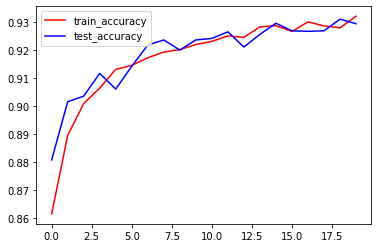

In [ ]:
# Visualise train / valid Accuracy
plt.plot(history.history["binary_accuracy"], c="r", label="train_accuracy")
plt.plot(history.history["val_binary_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

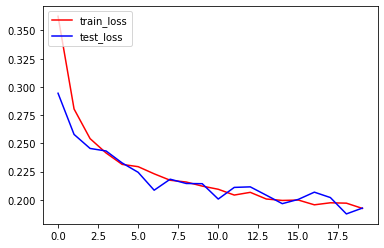

In [ ]:
# Visualise train / Valid Loss
plt.plot(history.history["loss"], c="r", label="train_loss")
plt.plot(history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Count the number of layers in the pre-trained model
len(base_model.layers)

155

In [ ]:
# Unlock a few layers
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
# Create again a compiler
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])

In [ ]:
# Train your model again to perform your fine tuning
history = model.fit(train_set,
                    validation_data=test_set,
                    epochs=20,
                    verbose=1
                    )

Epoch 1/20
1377/1377 [==============================] - 56s 40ms/step - loss: 0.1926 - binary_accuracy: 0.9364 - val_loss: 0.7441 - val_binary_accuracy: 0.8199
Epoch 2/20
1377/1377 [==============================] - 57s 41ms/step - loss: 0.1290 - binary_accuracy: 0.9560 - val_loss: 0.1807 - val_binary_accuracy: 0.9461
Epoch 3/20
1377/1377 [==============================] - 55s 40ms/step - loss: 0.1069 - binary_accuracy: 0.9635 - val_loss: 0.1094 - val_binary_accuracy: 0.9674
Epoch 4/20
1377/1377 [==============================] - 56s 40ms/step - loss: 0.1019 - binary_accuracy: 0.9646 - val_loss: 0.1060 - val_binary_accuracy: 0.9625
Epoch 5/20
1377/1377 [==============================] - 55s 40ms/step - loss: 0.0853 - binary_accuracy: 0.9701 - val_loss: 0.0837 - val_binary_accuracy: 0.9687
Epoch 6/20
1377/1377 [==============================] - 56s 41ms/step - loss: 0.0795 - binary_accuracy: 0.9733 - val_loss: 0.0937 - val_binary_accuracy: 0.9654
Epoch 7/20
1377/1377 [==================

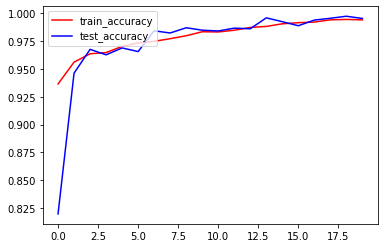

In [ ]:
# Visualise train / valid Accuracy
plt.plot(history.history["binary_accuracy"], c="r", label="train_accuracy")
plt.plot(history.history["val_binary_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

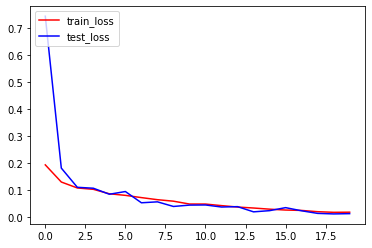

In [ ]:
# Visualise train / Valid Loss
plt.plot(history.history["loss"], c="r", label="train_loss")
plt.plot(history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()

In [ ]:
X_test = test_set.iloc[:, :-1]
Y_test = dataset.iloc[:, -1:]

X_test[:5]

AttributeError: ignored

In [ ]:
# Create a list of predictions for all dataset
y_pred = [np.argmax(model.predict_on_batch(pred),1) for pred in test_set.take(-1)]

In [ ]:
# Convert each prediction to list
y_pred = [list(y) for y in y_pred]

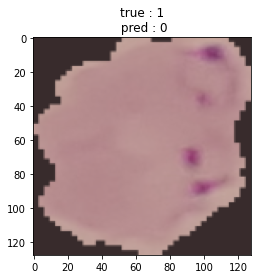

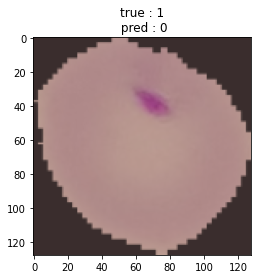

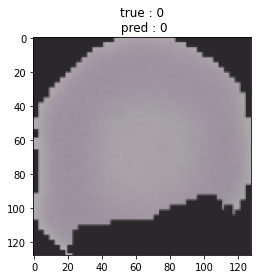

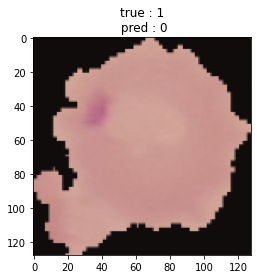

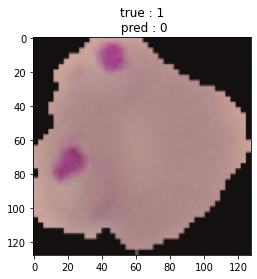

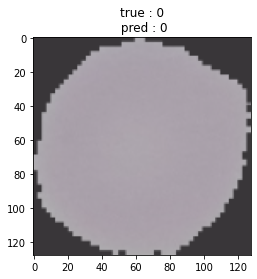

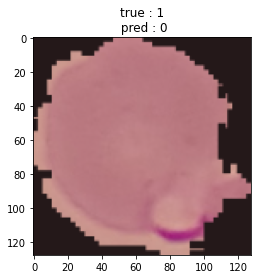

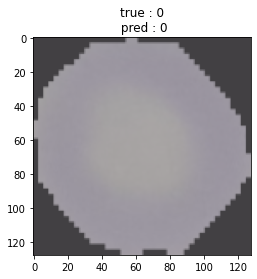

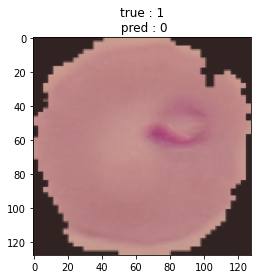

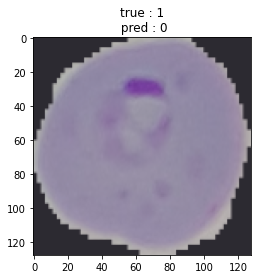

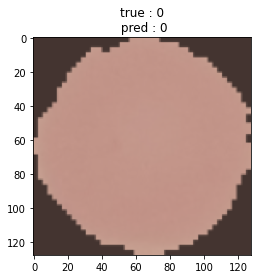

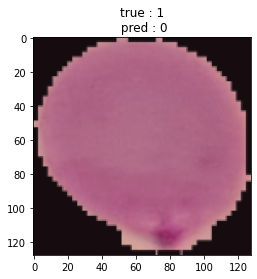

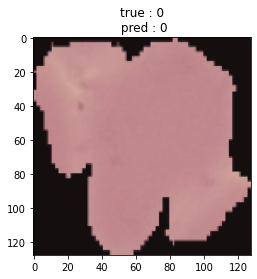

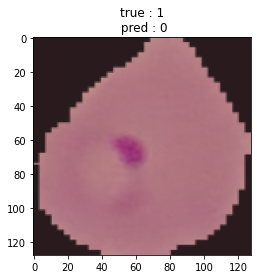

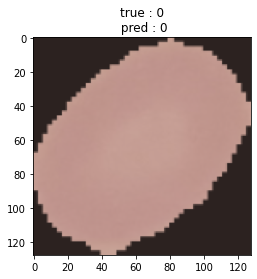

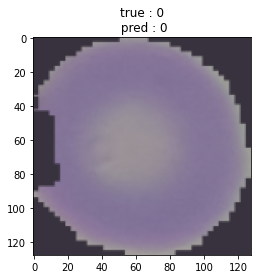

In [ ]:
# Visualise the first batch / get predictions on the test set
for x, y in test_set.take(1):
  for i in range(len(y)):
    plt.figure()
    plt.imshow(x.numpy()[i])
    plt.title("true : {}\n pred : {}".format(y.numpy()[i], y_pred[0][i]))
plt.show()